Saving puppy.jpg to puppy (4).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


<ipython-input-9-cf5be3a8b65b>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_classes)  # Use 'tab20' colormap with distinct colors


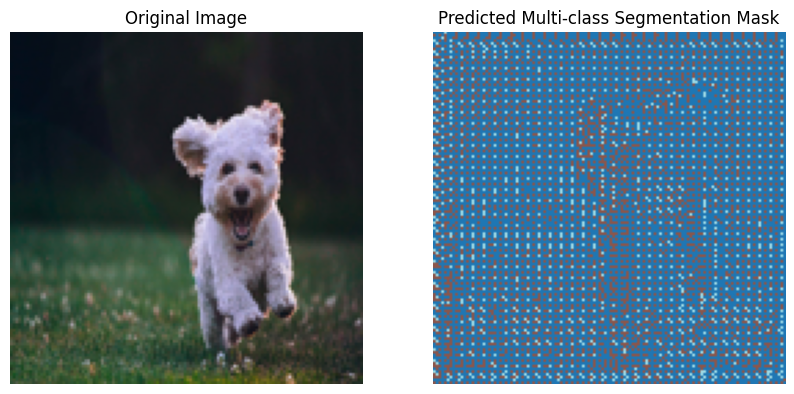

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
import io

def multi_class_cnn_segmentation(input_shape=(128, 128, 3), num_classes=3):  # Adjust num_classes
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Bottleneck
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)

    # Multi-class output
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)  # softmax for multi-class

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # categorical crossentropy for multi-class

    return model

# Upload image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load and preprocess user input image
img = Image.open(io.BytesIO(uploaded[file_name]))
img = img.resize((128, 128))
img_array = np.array(img) / 255.0  # Normalize
img_input = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Create and load model
model = multi_class_cnn_segmentation()

# Predict the segmentation mask
predicted_mask = model.predict(img_input)

# Remove batch dimension
predicted_mask = np.squeeze(predicted_mask)

# Visualize the multi-class mask with distinct colors for each class
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Assign distinct colors for each class
num_classes = predicted_mask.shape[-1]
colors = plt.cm.get_cmap('tab20', num_classes)  # Use 'tab20' colormap with distinct colors

# Create an empty canvas for the segmented result
segmented_image = np.zeros((predicted_mask.shape[0], predicted_mask.shape[1], 3))

# For each class, color the pixels that belong to that class
for i in range(num_classes):
    segmented_image += np.expand_dims(np.argmax(predicted_mask, axis=-1) == i, axis=-1) * np.array(colors(i)[:3])  # Apply color

axes[1].imshow(segmented_image)
axes[1].set_title("Predicted Multi-class Segmentation Mask")
axes[1].axis("off")

plt.show()
